#  DATA SCIENCE PROJECT

This project requires an analysis of a Brazilian e-commerce public dataset of orders made at Olist Store. 
The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. 
Its features allow viewing orders from multiple dimensions: from order status, price, payment, and freight performance to 
customer location, product attributes, and finally, reviews written by customers. 
There is also a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymized, and references to the companies and partners in the review text have 
been replaced with the names of Game of Thrones great houses.


### EDA and price prediction on Brazillian E-commerce olist store dataset

#### import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
import plotly.express as px

#### Importing, checking number of rows and columns and checking on missing values on individual datasets

In [ ]:
order_items = pd.read_csv('olist_1_order_items_dataset.csv')
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [ ]:
order_items.shape

(112650, 7)

In [ ]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Order items dataset has no missing values, and has 112650 rows and 7 columns

In [ ]:
products = pd.read_csv('olist_2_products_dataset.csv')
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [ ]:
products.shape

(32951, 9)

In [ ]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
product = products.dropna()
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
product.shape

(32340, 9)

Products datasets had 32951 rows and 9 columns, which after dropping the mising values became 32340 rows and 9 columns

In [ ]:
sellers = pd.read_csv('olist_3_sellers_dataset.csv')
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [ ]:
sellers.shape

(3095, 4)

In [ ]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Sellers dataset has no misising values, with 3095 rows and 4 columns

In [ ]:
geolocation = pd.read_csv('olist_4_geolocation_dataset.csv')
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [ ]:
geolocation.shape


(1000163, 5)

In [ ]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Geolocation dataset has 1000163 rows and  5 columns

In [ ]:
orders = pd.read_csv('olist_5_orders_dataset.csv')
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [ ]:
orders.shape

(99441, 8)

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders = orders.dropna()

orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
orders.shape

(96461, 8)

Orders dataset had 96461 rows and 8 columns which were achieved after dropping missing values

In [ ]:
customers = pd.read_csv('olist_6_customers_dataset.csv ')
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [ ]:
customers.shape

(99441, 5)

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Customers dataset has 99441 rows and 5 columns, with no missing values

In [ ]:
order_payments = pd.read_csv('olist_7_order_payments_dataset.csv')
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [ ]:
order_payments.shape

(103886, 5)

In [ ]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_payments dataset has 103886rows and 5 columns, no missing values

In [ ]:
order_reviews = pd.read_csv('olist_8_order_reviews_dataset.csv')
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [ ]:
order_reviews.shape

(100000, 7)

In [ ]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
order_reviews = order_reviews.drop(columns = ['review_comment_title','review_comment_message'])
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_creation_date review_answer_timestamp  
0             4  2018-01-18 00:00:00     2018-01-18 21:46:59  
1             5  2018-03-10 00:00:00     2018-03-11 03:05:13  
2             5  2018-02-17 00:00:00     2018-02-18 14:36:24  
3             5  2017-04-21 00:00:00     2017-04-21 22:02:06  
4             5  2018-03-01 00:00:00     2018-03-02 10:26:53

In [ ]:
order_reviews.shape

(100000, 5)

In [ ]:
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Order_reviews has 100000 rows and 5 columns which were attained after dropping review_comment_title and review_comment_message
columns which had missing values and were not nessessary in analysis and price prediction.

#### Merging the datasets

Since we have seller city seller state, customer city and customer state columns, geolocation is not particularly important

In [ ]:
df = orders.merge(order_payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(order_items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(order_reviews, on="order_id")
df = df.merge(sellers, on="seller_id")
olist = df
olist.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4    delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-08-17 15:28:33           2017-08-18 14:44:43   
4          2017-08-04 17:35:43           2017-08-07 18:30:01   

  order_estimated_delivery_date  payment_sequential payment_type  \
0           2017-10-18 00:00:00                   1  credit_card   
1           2017-10-18 00:00:00                   3      voucher   
2           2017-10-18 00:00:00                   2      voucher   
3           2017-08-28 00:00:00                   1  credit_card   
4           2017-08-15 00:00:00                   1  credit_card   

   payment_installments  payment_value                customer_unique_id  \
0                     1          18.12  7c396fd4830fd04220f754e42b4e5bff   
1                     1           2.00  7c396fd4830fd04220f754e42b4e5bff   
2                     1          18.59  7c396fd4830fd04220f754e42b4e5bff   
3                     3          37.77  3a51803cc0d012c3b5dc8b7528cb05f7   
4                     1          37.77  ef0996a1a279c26e7ecbd737be23d235   

   customer_zip_code_prefix customer_city customer_state  order_item_id  \
0                      3149     sao paulo             SP              1   
1                      3149     sao paulo             SP              1   
2                      3149     sao paulo             SP              1   
3                      3366     sao paulo             SP              1   
4                      2290     sao paulo             SP              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   

   shipping_limit_date  price  freight_value  product_category_name  \
0  2017-10-06 11:07:15  29.99           8.72  utilidades_domesticas   
1  2017-10-06 11:07:15  29.99           8.72  utilidades_domesticas   
2  2017-10-06 11:07:15  29.99           8.72  utilidades_domesticas   
3  2017-08-21 20:05:16  29.99           7.78  utilidades_domesticas   
4  2017-08-08 18:37:31  29.99           7.78  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       268.0                 4.0   
1                 40.0                       268.0                 4.0   
2                 40.0                       268.0                 4.0   
3                 40.0                       268.0                 4.0   
4                 40.0                       268.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             500.0               19.0                8.0              13.0   
1             500.0             

In [ ]:
olist.tail()

order_id                       customer_id  \
115706  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
115707  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
115708  ba4ff7bab012df64eed239c402ba6a0d  48ebd9467fef647e9a0cd9c1b9bdbe24   
115709  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
115710  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status order_purchase_timestamp    order_approved_at  \
115706    delivered      2018-07-01 10:23:10  2018-07-05 16:17:52   
115707    delivered      2018-07-24 09:46:27  2018-07-24 11:24:27   
115708    delivered      2018-01-11 23:07:22  2018-01-11 23:15:46   
115709    delivered      2018-05-22 21:13:21  2018-05-22 21:35:40   
115710    delivered      2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date order_delivered_customer_date  \
115706          2018-07-04 14:34:00           2018-07-09 15:06:57   
115707          2018-07-24 15:14:00           2018-08-02 22:47:35   
115708          2018-01-22 21:32:12           2018-01-30 11:11:47   
115709          2018-05-24 12:28:00           2018-06-12 23:11:29   
115710          2018-05-16 17:20:00           2018-05-21 14:31:41   

       order_estimated_delivery_date  payment_sequential payment_type  \
115706           2018-07-20 00:00:00                   1       boleto   
115707           2018-08-16 00:00:00                   1   debit_card   
115708           2018-02-09 00:00:00                   1  credit_card   
115709           2018-06-08 00:00:00                   1  credit_card   
115710           2018-05-29 00:00:00                   1       boleto   

        payment_installments  payment_value                customer_unique_id  \
115706                     1          93.13  2077f7ec37df79c62cc24b7b8f30e8c9   
115707                     1         444.07  8cf3c6e1d2c8afaab2eda3fa01d4e3d2   
115708                     3          86.15  5b4c417664eae14efe4633d6982812c2   
115709                     4         244.02  e55e436481078787e32349cee9febf5e   
115710                     1          28.29  6ceea7c1088e15ab3c67980a2d9bb309   

        customer_zip_code_prefix          customer_city customer_state  \
115706                      8528  ferraz de vasconcelos             SP   
115707                     60455              fortaleza             CE   
115708                     84130               palmeira             PR   
115709                     39803          teofilo otoni             MG   
115710                      9687  sao bernardo do campo             SP   

        order_item_id                        product_id  \
115706              1  31ec3a565e06de4bdf9d2a511b822b4d   
115707              1  1d187e8e7a30417fda31e85679d96f0f   
115708              1  dc2f80dfc6b4e57be59ec9dfe9140849   
115709              1  6e1c2008dea1929b9b6c27fa01381e90   
115710              1  9c1e194db1d35a79d962ea610bfe0868   

                               seller_id  shipping_limit_date  price  \
115706  babcc0ab201e4c60188427cae51a5b8b  2018-07-10 08:32:33   79.0   
115707  d263fa444c1504a75cbca5cc465f592a  2018-07-30 11:24:27  399.0   
115708  d6cd01c59123df02fc226eadbadb5f89  2018-01-17 23:15:46   69.9   
115709  edf3fabebcc20f7463cc9c53da932ea8  2018-05-28 21:31:24  219.9   
115710  f3862c2188522d89860c38a3ea8b550d  2018-05-22 03:35:29   15.5   

        freight_value              product_category_name  product_name_lenght  \
115706          14.13  construcao_ferramentas_iluminacao                 40.0   
115707          45.07                   moveis_decoracao                 43.0   
115708          16.25                        eletronicos                 43.0   
115709          24.12                   moveis_decoracao                 19.0   
115710          12.79                         perfumaria                 40.0   

        product_description_lenght  product_photos_qty  product_weight_g  \
115706     

### Time series analysis

#### Sales over the years

#### Using order_purchase_timestamp column

In [ ]:
# convert order_purchase_timestamp to datetime
olist["order_purchase_timestamp"] = pd.to_datetime(olist["order_purchase_timestamp"])
olist["order_purchase_timestamp"].head()

0   2017-10-02 10:56:33
1   2017-10-02 10:56:33
2   2017-10-02 10:56:33
3   2017-08-15 18:29:31
4   2017-08-02 18:24:47
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [ ]:
# Extract year
olist_year = olist["order_purchase_timestamp"].dt.year
olist_year.head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: order_purchase_timestamp, dtype: int64

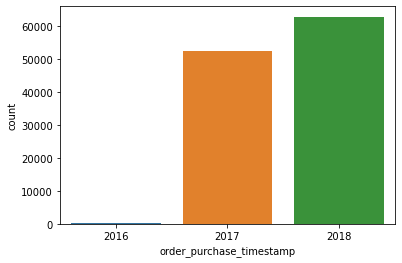

In [ ]:
sns.countplot(x = olist_year)

#### Using order delivery date column

In [ ]:
# convert order_purchase_timestamp to datetime
olist["order_estimated_delivery_date"] = pd.to_datetime(olist["order_estimated_delivery_date"])
olist["order_estimated_delivery_date"].head()

0   2017-10-18
1   2017-10-18
2   2017-10-18
3   2017-08-28
4   2017-08-15
Name: order_estimated_delivery_date, dtype: datetime64[ns]

In [ ]:
# Extract year
olist_year = olist["order_estimated_delivery_date"].dt.year
olist_year.head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: order_estimated_delivery_date, dtype: int64

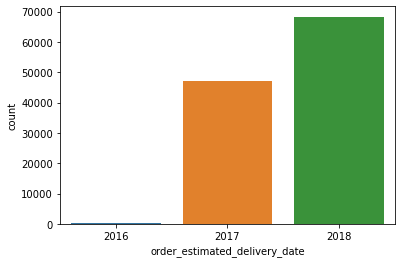

In [ ]:
sns.countplot(x = olist_year)

From both countplots, sales increased over the years

#### Exploring the dataset

In [ ]:
olist.shape

(115711, 37)

Olist dataset has 115711 rows and 37 columns

In [ ]:
olist.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   

In [ ]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115711 entries, 0 to 115710
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115711 non-null  object        
 1   customer_id                    115711 non-null  object        
 2   order_status                   115711 non-null  object        
 3   order_purchase_timestamp       115711 non-null  datetime64[ns]
 4   order_approved_at              115711 non-null  object        
 5   order_delivered_carrier_date   115711 non-null  object        
 6   order_delivered_customer_date  115711 non-null  object        
 7   order_estimated_delivery_date  115711 non-null  datetime64[ns]
 8   payment_sequential             115711 non-null  int64         
 9   payment_type                   115711 non-null  object        
 10  payment_installments           115711 non-null  int64         
 11  

### Cleaning olist dataset

#### Missing values

In [ ]:
olist.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1637
product_name_lenght              1637
product_description_lenght       1637
product_photos_qty               1637
product_weig

In [ ]:
olist.product_category_name.shape

(115711,)

In [ ]:
# Dropping missing values
olist = olist.dropna()
olist.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

#### Duplicates

In [ ]:
olist.duplicated().sum()

0

Since not all columns are necessary in this analysis,i will drop the unnecessary ones

In [ ]:
olist.drop(['order_id','order_item_id','product_id','seller_id','shipping_limit_date',
                            'seller_zip_code_prefix'],axis=1, inplace= True)


In [ ]:
olist.drop(['order_delivered_carrier_date', 'order_delivered_customer_date',
              'customer_unique_id','customer_zip_code_prefix','review_id'],axis=1, inplace= True)

In [ ]:
olist.drop(['review_creation_date','customer_id','order_estimated_delivery_date',
              'order_purchase_timestamp', 'order_approved_at','review_answer_timestamp'],axis=1, inplace= True)

In [ ]:
olist.columns

Index(['order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_city',
       'customer_state', 'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score', 'seller_city',
       'seller_state'],
      dtype='object')

#### Getting the categotical and numerical variables

In [ ]:
categorical_variables_df= olist.select_dtypes(include=['object'])
categorical_variables_df.columns

Index(['order_status', 'payment_type', 'customer_city', 'customer_state',
       'product_category_name', 'seller_city', 'seller_state'],
      dtype='object')

In [ ]:
numerical_variables_df= olist.select_dtypes(exclude=['object'])
numerical_variables_df.columns

Index(['payment_sequential', 'payment_installments', 'payment_value', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score'],
      dtype='object')

#### checking for outliers

<function matplotlib.pyplot.show(*args, **kw)>

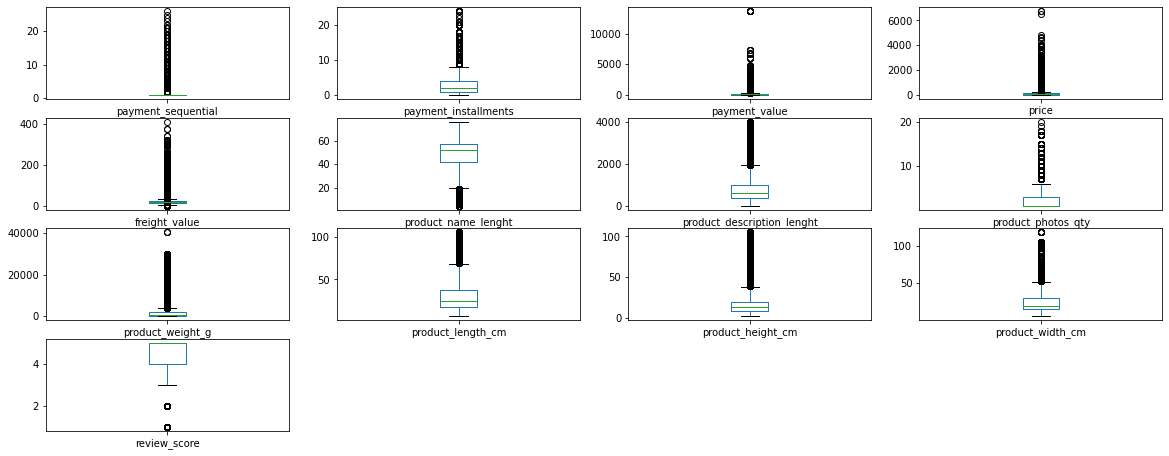

In [ ]:
numerical_variables_df.plot(kind='box', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

There are so many outliers where product_name_length, product_lenth_cm and review score has the least outliers

Log function will help reduce the outliers

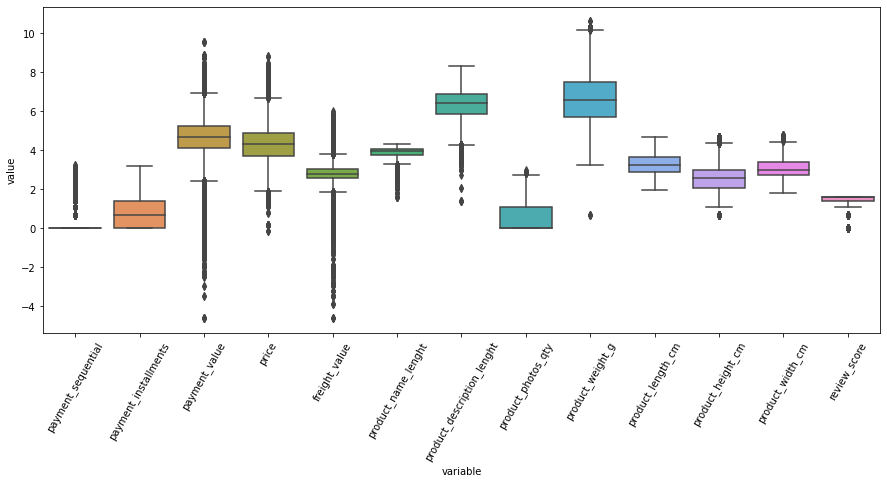

In [ ]:
for c in numerical_variables_df:
    numerical_variables_df[c] = np.log(numerical_variables_df[c])
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df = pd.DataFrame(data = numerical_variables_df, columns = numerical_variables_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df))
plt.xticks(rotation=60)

plt.show()

#### Descriptive statistics

We get to see the mean, standard deviation, minimum and maximum values and the quartiles

In [ ]:
olist.describe()

payment_sequential  payment_installments  payment_value          price  \
count       114073.000000         114073.000000  114073.000000  114073.000000   
mean             1.090521              2.946447     172.142815     120.015780   
std              0.684487              2.781708     266.122915     182.403188   
min              1.000000              0.000000       0.000000       0.850000   
25%              1.000000              1.000000      60.950000      39.900000   
50%              1.000000              2.000000     108.060000      74.900000   
75%              1.000000              4.000000     189.370000     133.000000   
max             26.000000             24.000000   13664.080000    6735.000000   

       freight_value  product_name_lenght  product_description_lenght  \
count  114073.000000        114073.000000               114073.000000   
mean       20.010026            48.802135                  784.807343   
std        15.726486            10.016714                  650.561259   
min         0.000000             5.000000                    4.000000   
25%        13.080000            42.000000                  345.000000   
50%        16.320000            52.000000                  600.000000   
75%        21.190000            57.000000                  983.000000   
max       409.680000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count       114073.000000     114073.000000      114073.000000   
mean             2.206482       2108.578051          30.288535   
std              1.718006       3768.377345          16.157362   
min              1.000000          0.000000           7.000000   
25%              1.000000        300.000000          18.000000   
50%              1.000000        700.000000          25.000000   
75%              3.000000       1800.000000          38.000000   
max             20.000000      40425.000000         105.000000   

       product_height_cm  product_width_cm   review_score  
count      114073.000000     114073.000000  114073.000000  
mean           16.606989         23.105091       4.067106  
std            13.439623         11.739685       1.357896  
min             2.000000          6.000000       1.000000  
25%             8.000000         15.000000       4.000000  
50%            13.000000         20.000000       5.000000  
75%            20.000000         30.000000       5.000000  
max           105.000000        118.000000       5.000000

### Explolatory data analysis

#### Univaraite Analysis

#### Most and least selling items

In [ ]:
olist.product_category_name.nunique()

73

##### Most selling items

Text(0, 0.5, 'Proportion')

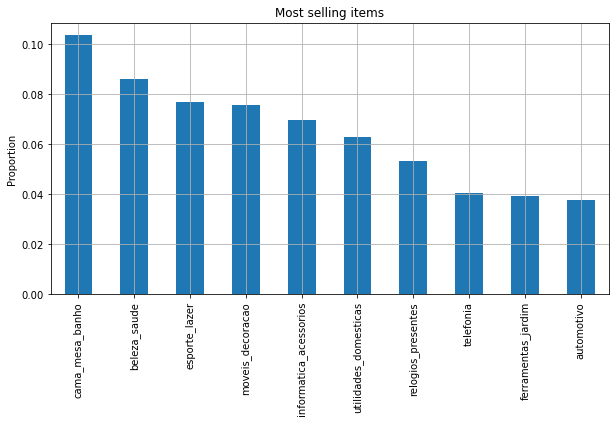

In [ ]:
olist.product_category_name.value_counts(normalize = True)[:10].plot.bar(figsize=(10, 5), grid = True)
plt.title('Most selling items')
plt.ylabel('Proportion')


##### least selling items

Text(0, 0.5, 'Proportion')

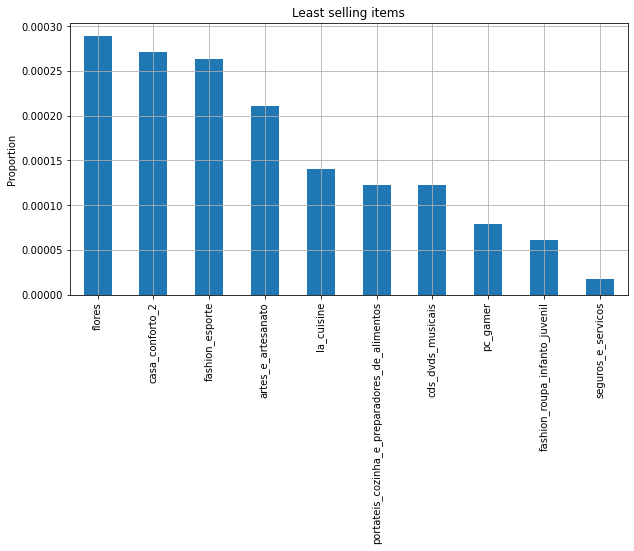

In [ ]:
olist.product_category_name.value_counts(normalize = True)[63:].plot.bar(figsize=(10, 5), grid = True)
plt.title('Least selling items')
plt.ylabel('Proportion')

#### Products review scores

Text(0, 0.5, 'Proportion')

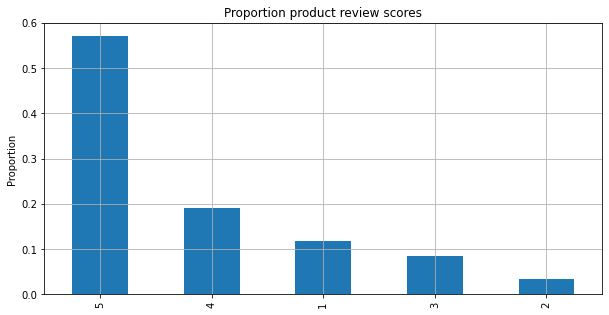

In [ ]:
olist.review_score.value_counts(normalize = True).plot.bar(figsize=(10, 5), grid = True)
plt.title('Proportion product review scores')
plt.ylabel('Proportion')

Over 55% of theproducts had the highest review score of 5

##### 10 products with highest average review scores

Text(0, 0.5, 'Proportion')

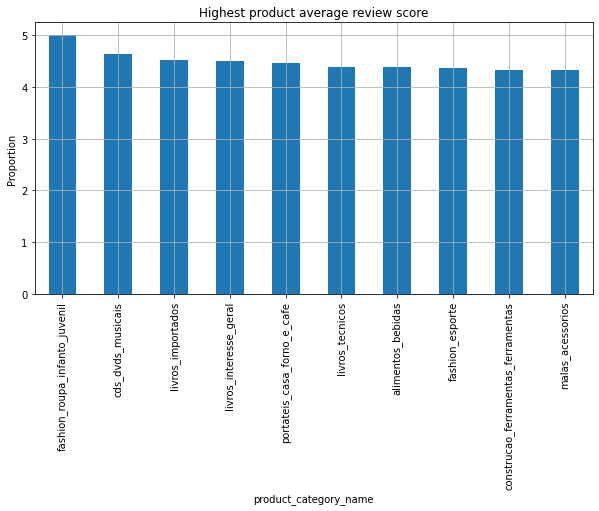

In [ ]:
review_count = olist.groupby("product_category_name").review_score.mean().sort_values(ascending=False)
review_count.head(10).sort_values(ascending=False).plot.bar(figsize=(10, 5), grid = True)
plt.title('Highest product average review score')
plt.ylabel('Proportion')

##### Products with lowest average review scores

Text(0, 0.5, 'Proportion')

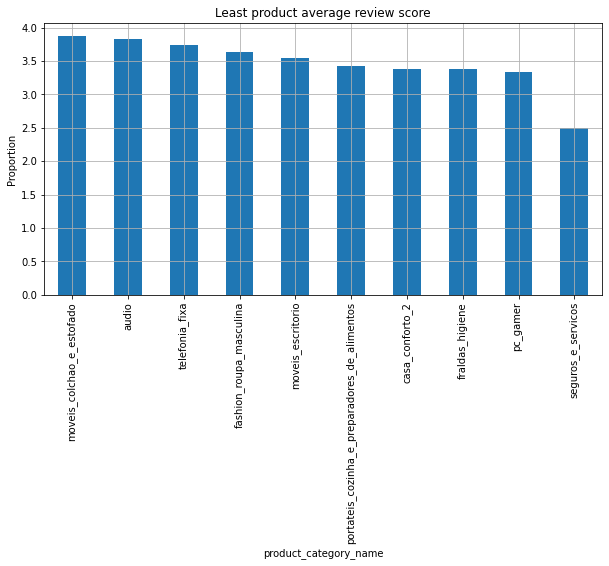

In [ ]:
review_count.tail(10).sort_values(ascending=False).plot.bar(figsize=(10, 5), grid = True)
plt.title('Least product average review score')
plt.ylabel('Proportion')

#### Understanding modes of payment

In [ ]:
olist.payment_type.value_counts(normalize = True, sort=True,ascending=False)

credit_card    0.737975
boleto         0.194516
voucher        0.053194
debit_card     0.014315
Name: payment_type, dtype: float64

About 74% of customers used credit card as the mode of payment while debit cards were least used

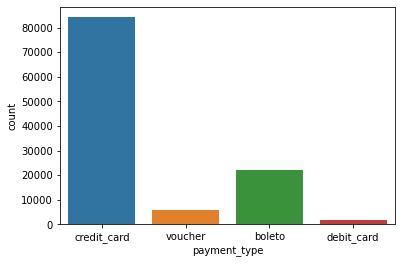

In [ ]:
sns.countplot(x=olist.payment_type)

Text(0, 0.5, 'Proportion')

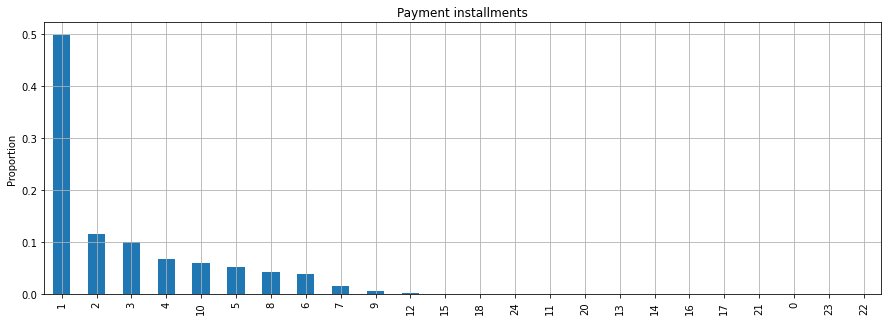

In [ ]:
olist.payment_installments.value_counts(normalize =True).sort_values(ascending = False).plot.bar(figsize=(15, 5), grid = True)
plt.title('Payment installments')
plt.ylabel('Proportion')

About 50% of the customers paid in full, while the rest paid in installments

In [ ]:
orders.order_status.value_counts(normalize= False)

delivered    96455
canceled         6
Name: order_status, dtype: int64

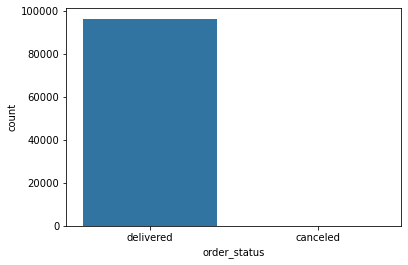

In [ ]:
sns.countplot(x=orders.order_status)

Almost 100% of the orders were delivered

##### proportion of product category names

In [ ]:
olist.product_category_name.value_counts(normalize = True).head()

cama_mesa_banho           0.103574
beleza_saude              0.086050
esporte_lazer             0.077056
moveis_decoracao          0.075741
informatica_acessorios    0.069806
Name: product_category_name, dtype: float64

Text(0, 0.5, 'Proportion')

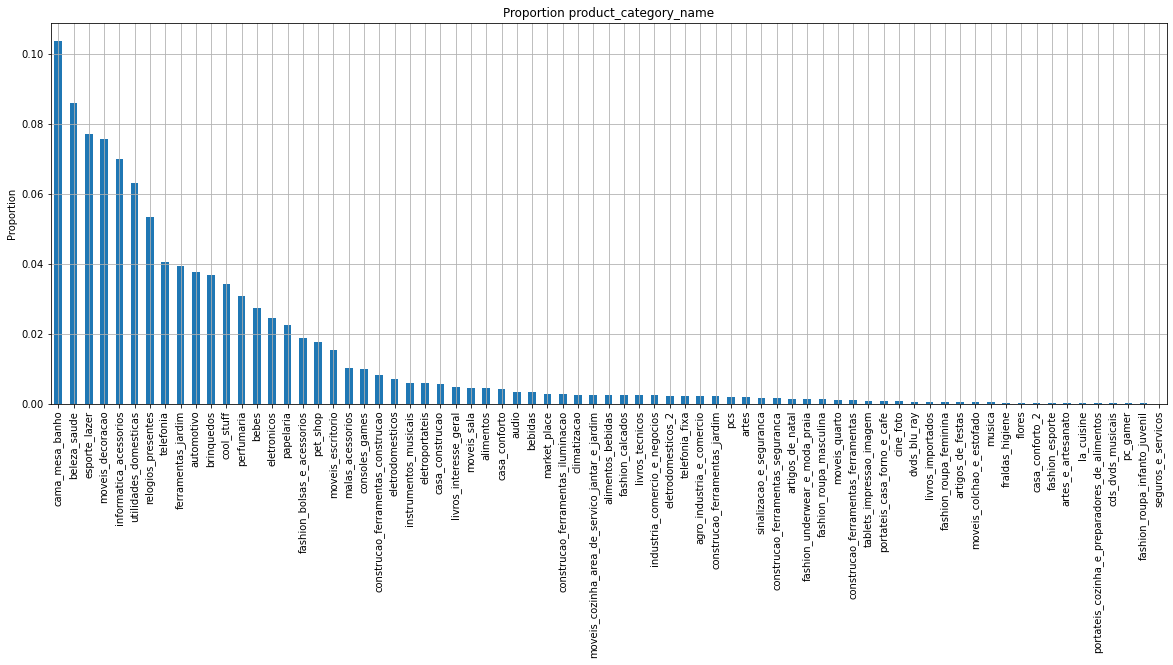

In [ ]:
olist.product_category_name.value_counts(normalize = True).plot.bar(figsize=(20, 7), grid = True)
plt.title('Proportion product_category_name')
plt.ylabel('Proportion')

##### Proportion of Top 50 seller cities

In [ ]:
seller_city1 = olist.seller_city.value_counts(normalize = True).sort_values(ascending = False)
seller_city1.head()

sao paulo                0.249200
ibitinga                 0.071814
curitiba                 0.026886
santo andre              0.026869
sao jose do rio preto    0.023231
Name: seller_city, dtype: float64

Text(0, 0.5, 'Proportion')

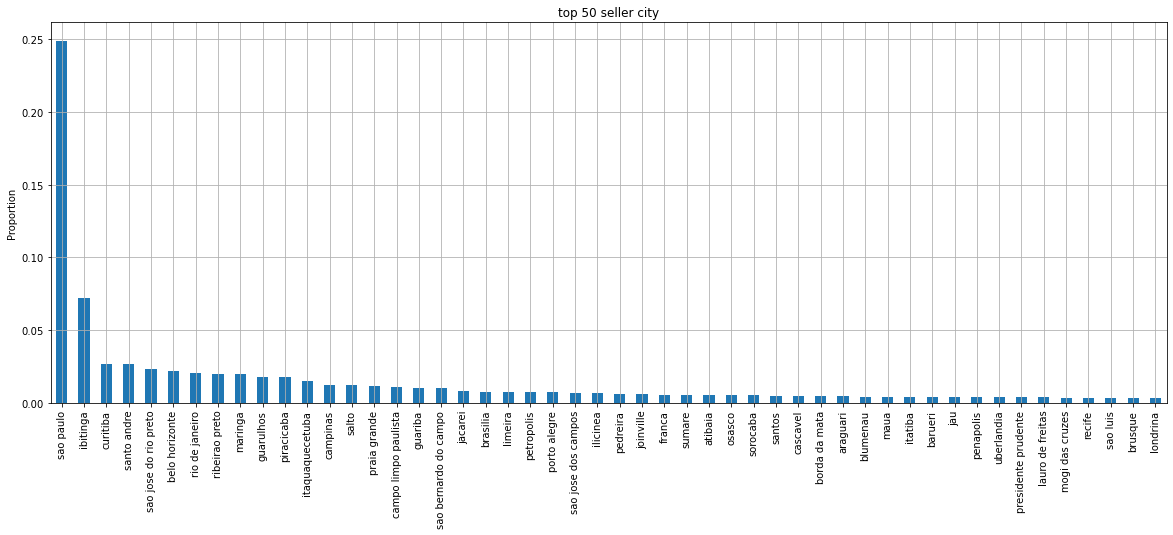

In [ ]:
seller_city1.head(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('top 50 seller city')
plt.ylabel('Proportion')

##### Proportion Least 50 seller cities

Text(0, 0.5, 'Proportion')

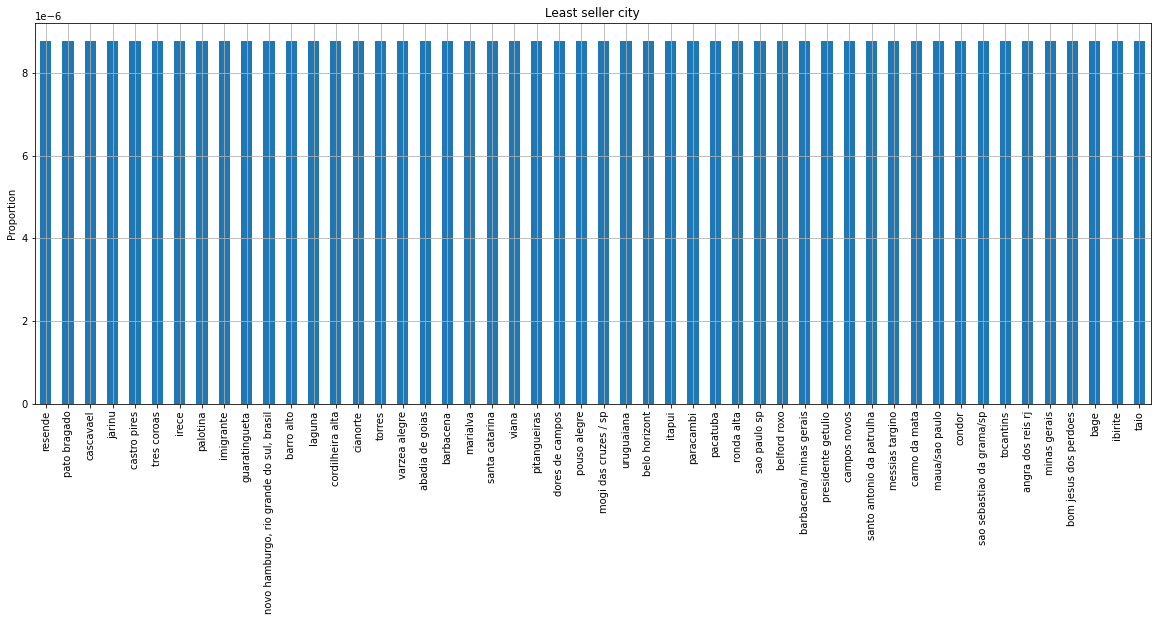

In [ ]:
seller_city1.tail(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('Least seller city')
plt.ylabel('Proportion')

##### Proportion of Seller state

In [ ]:
olist.seller_state.value_counts(normalize = True).head()

SP    0.713341
MG    0.077722
PR    0.077249
RJ    0.042227
SC    0.036591
Name: seller_state, dtype: float64

Text(0, 0.5, 'Proportion')

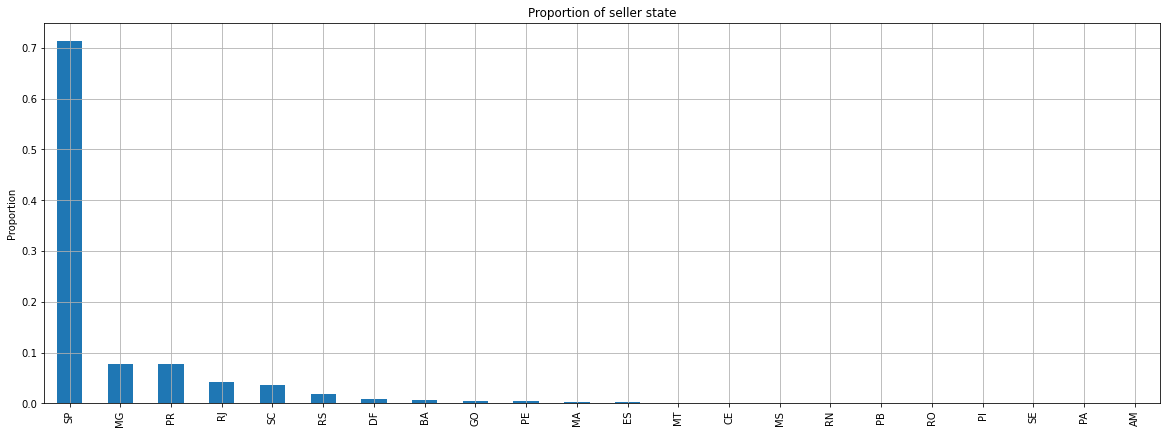

In [ ]:
olist.seller_state.value_counts(normalize = True).plot.bar(figsize=(20, 7), grid = True)
plt.title('Proportion of seller state')
plt.ylabel('Proportion')

##### Proportion of Top 50 customer cities

In [ ]:
customer_city1 = olist.customer_city.value_counts(normalize = True)
customer_city1.head()

sao paulo         0.157820
rio de janeiro    0.069017
belo horizonte    0.027702
brasilia          0.021039
curitiba          0.015560
Name: customer_city, dtype: float64

Text(0, 0.5, 'Proportion')

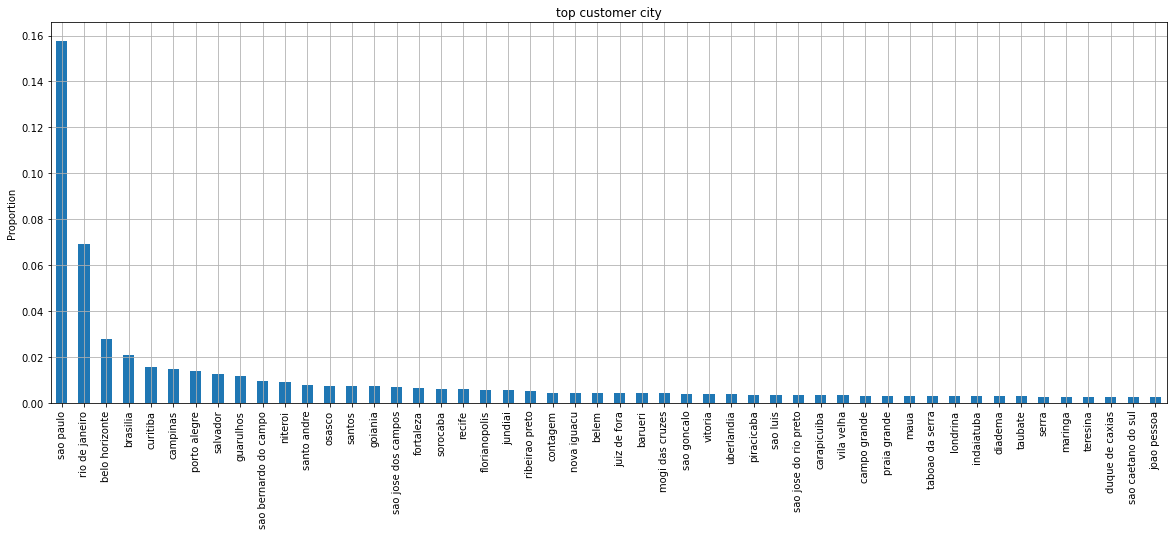

In [ ]:
customer_city1.head(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('top customer city')
plt.ylabel('Proportion')

#####  Proportion of 50 least cities

Text(0, 0.5, 'Proportion')

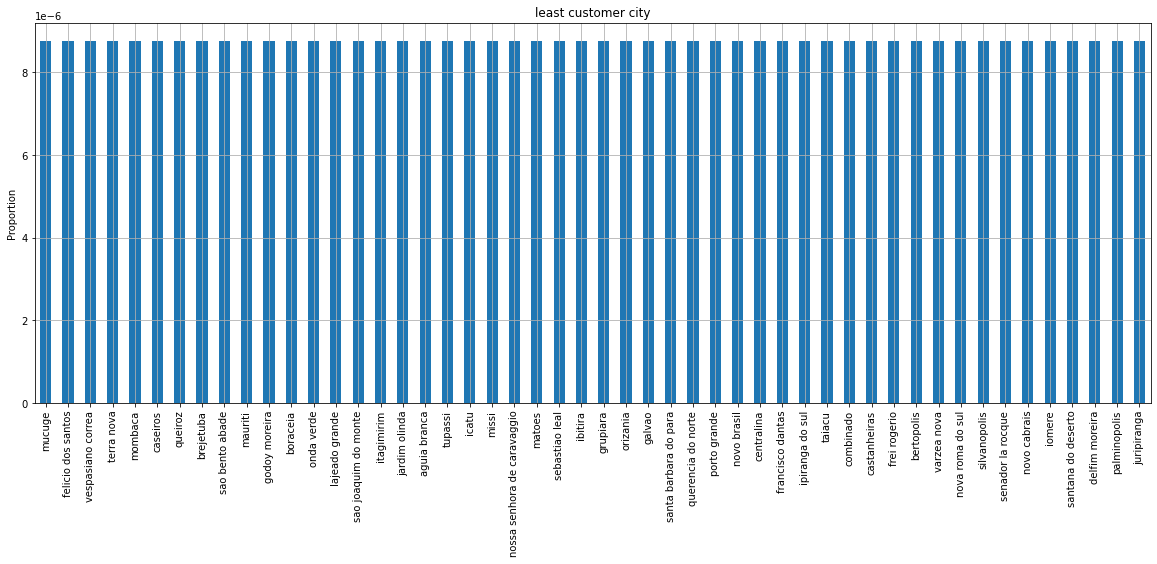

In [ ]:
customer_city1 = olist.customer_city.value_counts(normalize = True)
customer_city1.tail(50).head(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('least customer city')
plt.ylabel('Proportion')

##### Proportion of Customer state

In [ ]:
olist.customer_state.value_counts(normalize=True).head()

SP    0.421844
RJ    0.129207
MG    0.116697
RS    0.055508
PR    0.050985
Name: customer_state, dtype: float64

Text(0, 0.5, 'Proportion')

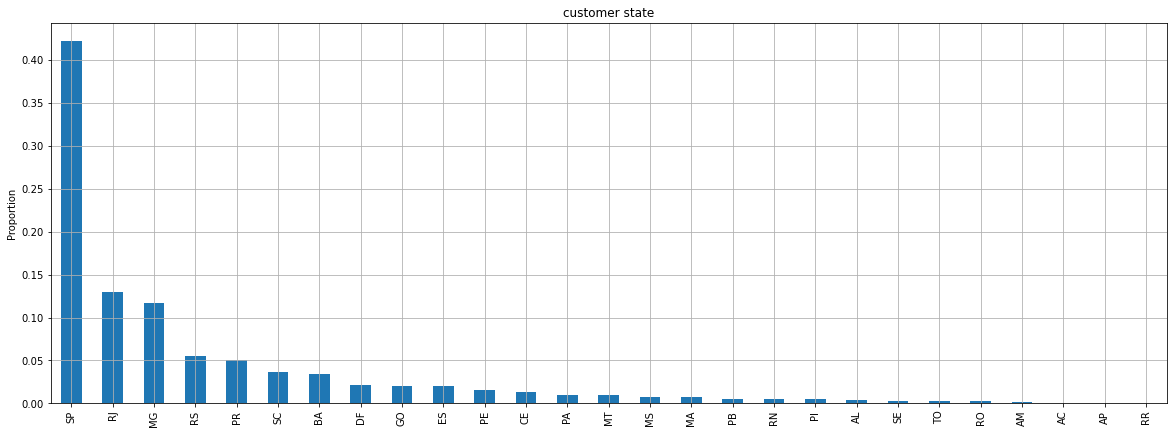

In [ ]:
olist.customer_state.value_counts(normalize=True).plot.bar(figsize=(20, 7), grid = True)
plt.title('customer state')
plt.ylabel('Proportion')

### Bivariate Analysis

###### Payment_type and payment installments using cross tabulation

In [ ]:
olist.groupby('payment_type')['payment_installments'].mean()

payment_type
boleto         1.000000
credit_card    3.637552
debit_card     1.000000
voucher        1.000000
Name: payment_installments, dtype: float64

In [ ]:
pay_inst = pd.crosstab(olist.payment_installments, olist.payment_type)
pay_inst.head()

payment_type          boleto  credit_card  debit_card  voucher
payment_installments                                          
0                          0            3           0        0
1                      22189        26920        1633     6068
2                          0        13244           0        0
3                          0        11403           0        0
4                          0         7756           0        0

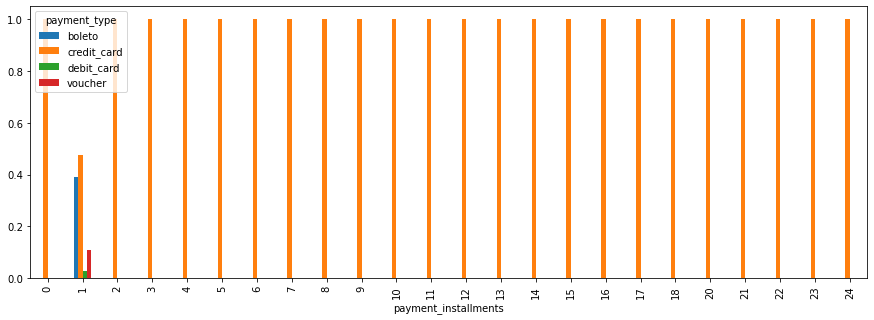

In [ ]:
pay_inst.div(pay_inst.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15, 5))

Only credit card users paid in installments

##### Prices of the products

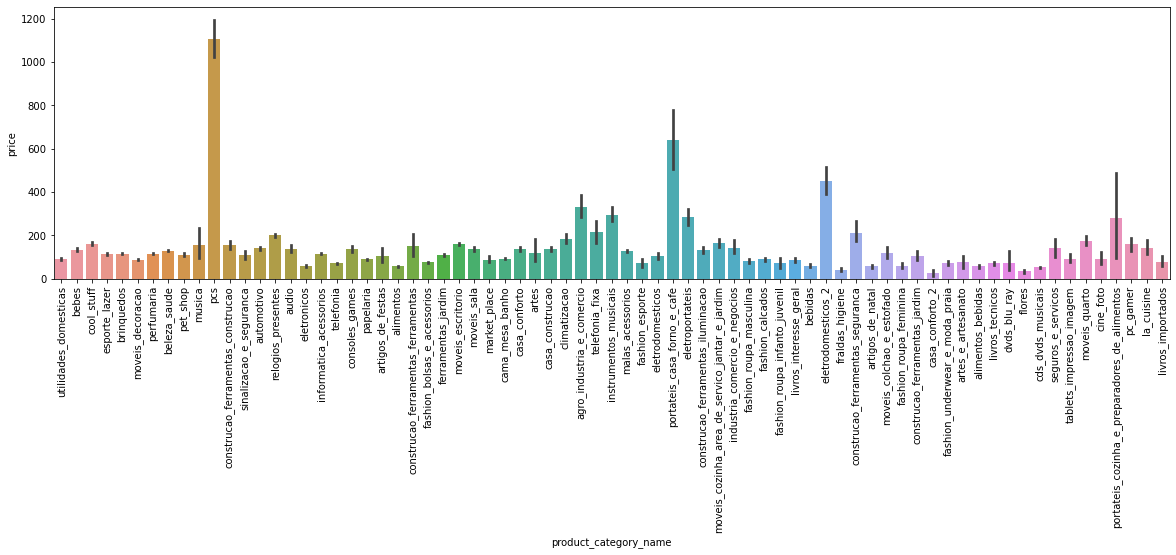

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.product_category_name, y=olist.price)

##### Products prices in different seller states

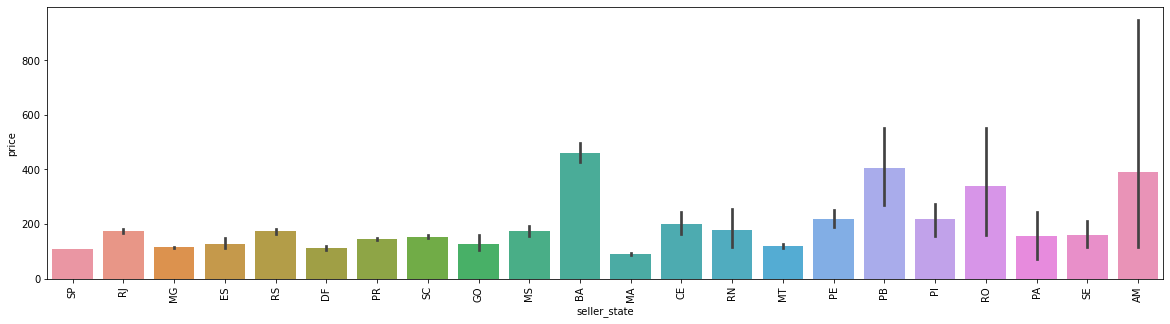

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.seller_state, y=olist.price)

##### product pricesin different customer states

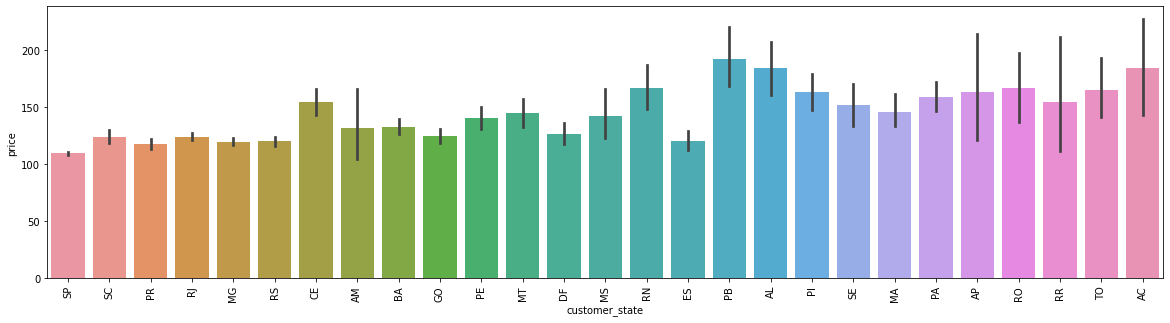

In [ ]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.customer_state, y=olist.price)

##### Effect of type of payment on price 

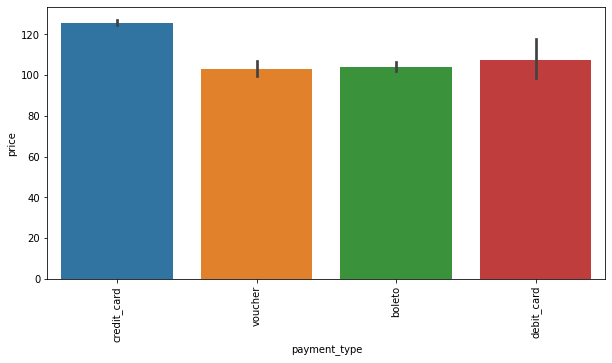

In [ ]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.payment_type, y=olist.price)

##### Product average prices in different customer city 

In [ ]:
customer_city2 = olist.groupby('customer_city')['price'].mean().sort_values(ascending = False)
customer_city2.head(10)

customer_city
pianco                     2200.00
nova esperanca do piria    2199.00
engenheiro navarro         1997.00
sape                       1850.00
mariental                  1799.00
loreto                     1599.99
ibitita                    1450.00
bonfinopolis de minas      1359.90
pirpirituba                1340.00
barao ataliba nogueira     1300.00
Name: price, dtype: float64

In [ ]:
customer_city2.tail(10)

customer_city
bom jardim de goias             10.00
tamboara                         8.99
medicilandia                     8.99
macieira                         8.73
erico cardoso                    8.09
jenipapo de minas                7.48
santo antonio do rio abaixo      6.00
senador jose porfirio            6.00
sabaudia                         5.90
polo petroquimico de triunfo     5.60
Name: price, dtype: float64

###### Average prices of products in different seller cities

In [ ]:
seller_city2 = olist.groupby('seller_city')['price'].mean().sort_values(ascending = False)
seller_city2.head(10)

seller_city
bofete                   3133.323333
california               1271.666667
paincandu                1228.493750
montes claros             941.000000
mamanguape                911.274000
dores de campos           899.000000
luiz alves                841.187500
sao  jose dos pinhais     799.000000
guanambi                  796.454545
sombrio                   739.481818
Name: price, dtype: float64

In [ ]:
seller_city2.tail(10)

seller_city
garulhos        18.6925
barrinha        18.2450
aparecida       17.4674
pelotas         16.9500
andira-pr       16.9000
jarinu          14.6300
macatuba        13.0000
floranopolis     9.9900
palotina         9.9900
brotas           6.2500
Name: price, dtype: float64

##### Here, we will create will drop seller city and customer city columns as they have so many variables, for further analysis

In [ ]:
categorical_vars = categorical_variables_df.drop(['seller_city','customer_city'], 1)
categorical_vars.columns

Index(['order_status', 'payment_type', 'customer_state',
       'product_category_name', 'seller_state'],
      dtype='object')

In [ ]:
categorical_vars['price']=olist.price
olist.price.describe()

count    114073.000000
mean        120.015780
std         182.403188
min           0.850000
25%          39.900000
50%          74.900000
75%         133.000000
max        6735.000000
Name: price, dtype: float64

In [ ]:
bins = [0,40,75,133,6735]
group=['Low','Average','High', 'Very High'] 
categorical_vars['price_cat'] = pd.cut(categorical_vars['price'], bins, labels=group)
categorical_vars.head()

order_status payment_type customer_state  product_category_name  \
0    delivered  credit_card             SP  utilidades_domesticas   
1    delivered      voucher             SP  utilidades_domesticas   
2    delivered      voucher             SP  utilidades_domesticas   
3    delivered  credit_card             SP  utilidades_domesticas   
4    delivered  credit_card             SP  utilidades_domesticas   

  seller_state  price price_cat  
0           SP  29.99       Low  
1           SP  29.99       Low  
2           SP  29.99       Low  
3           SP  29.99       Low  
4           SP  29.99       Low

In [ ]:
categorical_variables_df_1 = categorical_vars.drop(['price','price_cat'], 1)
price_cat = categorical_vars.price_cat

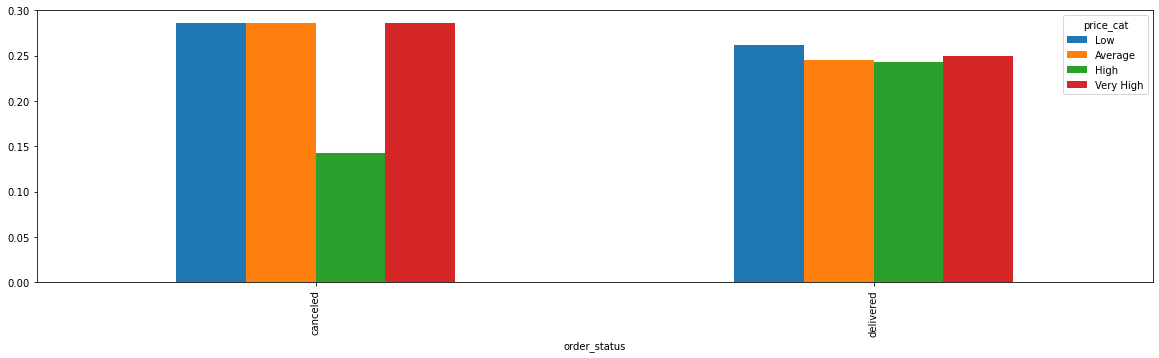

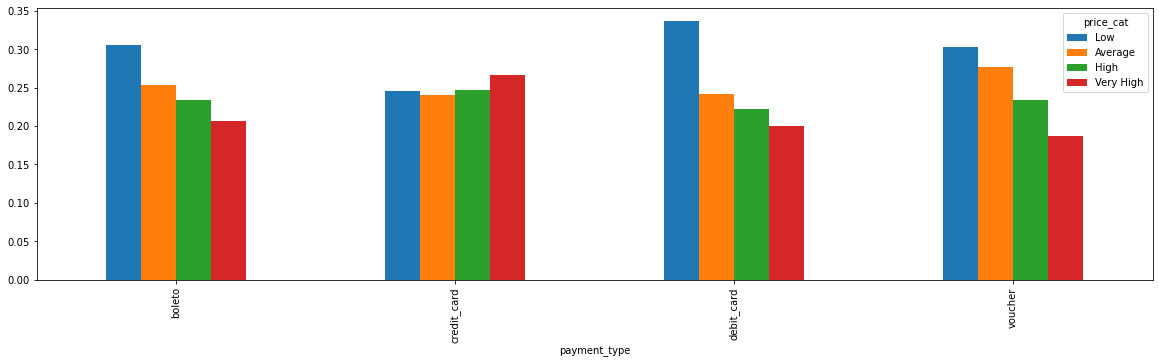

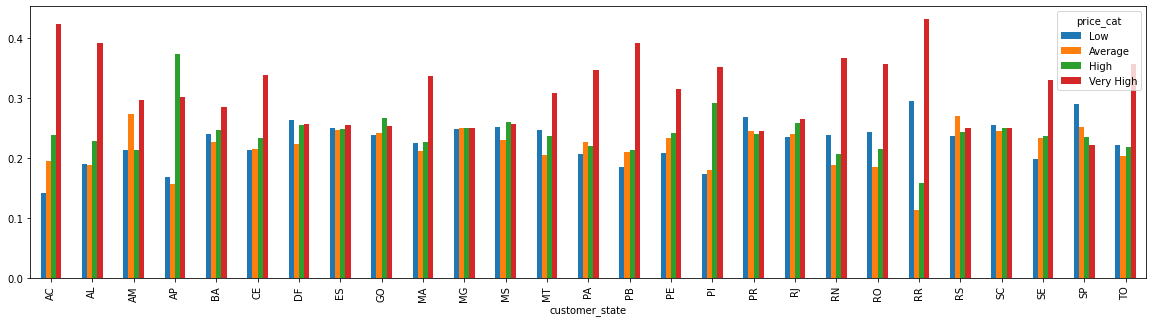

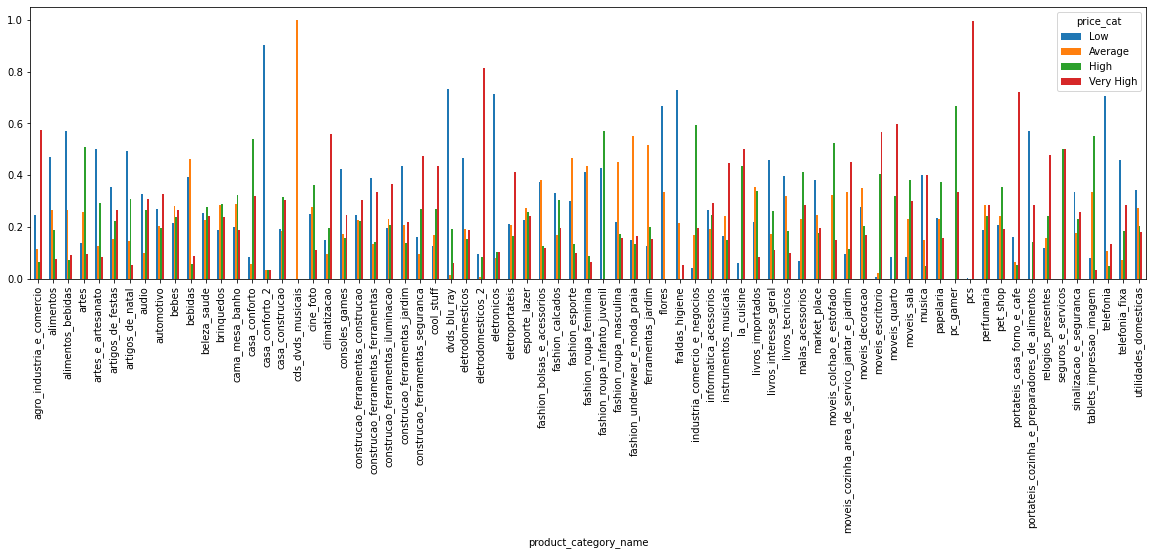

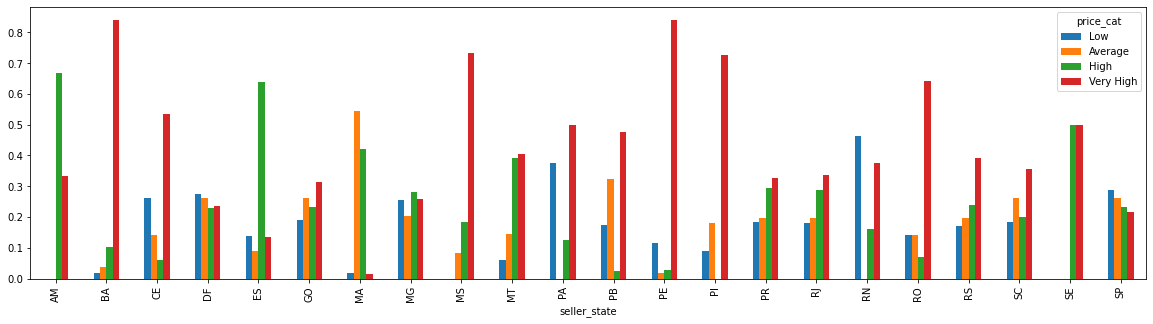

In [ ]:
for col in categorical_variables_df_1:
    price_bin=pd.crosstab(categorical_variables_df[col], price_cat) 
    price_bin.div(price_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(20, 5)) 
plt.show()

### Continuous variables visualization

#### Histograms

<function matplotlib.pyplot.show(*args, **kw)>

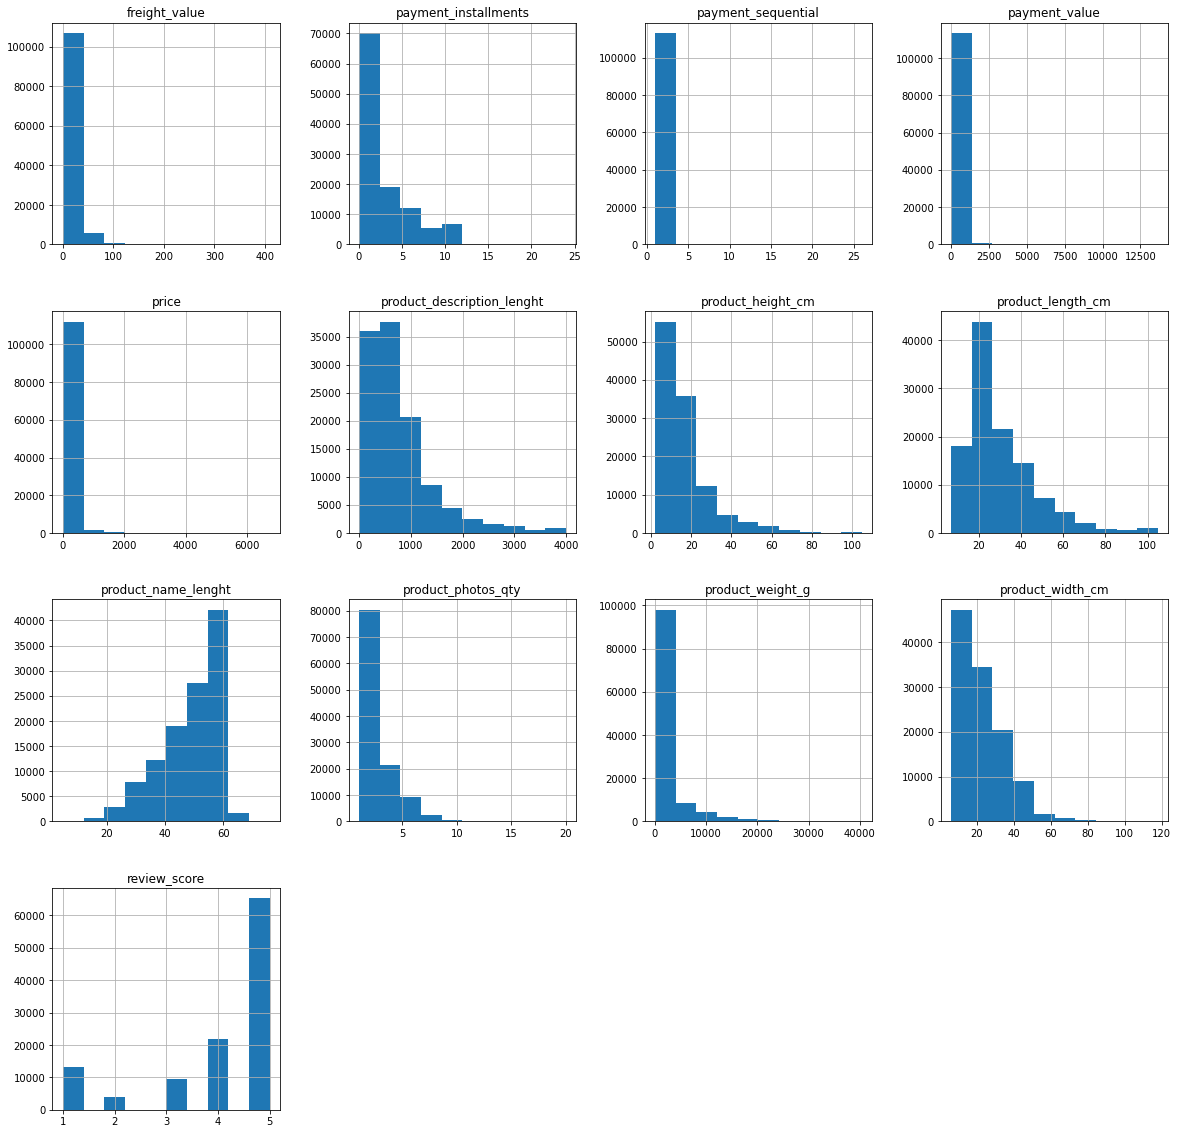

In [ ]:
olist.hist(figsize=(20,20))
plt.show

#### Density plots

<function matplotlib.pyplot.show(*args, **kw)>

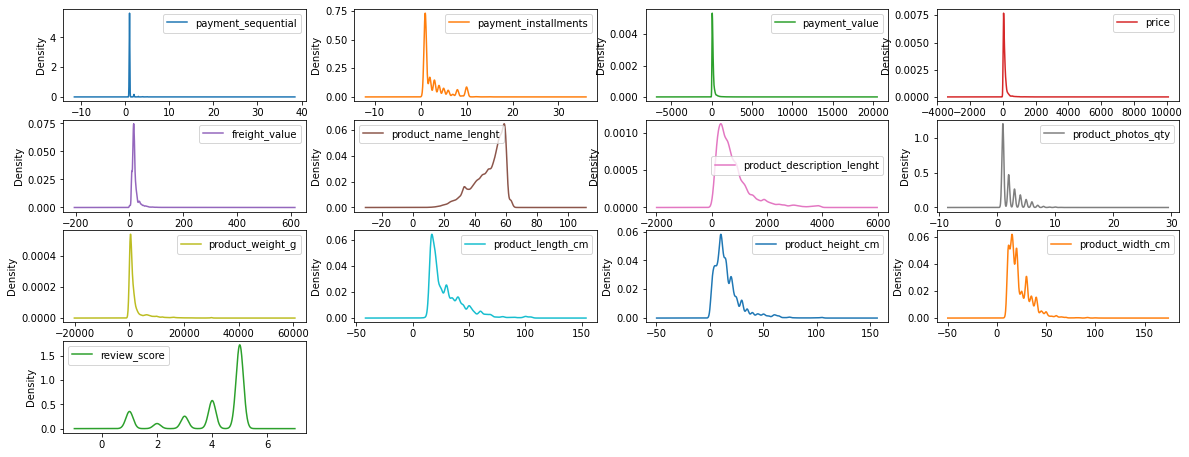

In [ ]:
olist.plot(kind='density', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

The above distribution and desity plots show the distribution of each numerical feature for both the
positive and negative classes. We can observe that there is an almost complete overlap of 
both the distribution for the positive and negative classes which suggests that it is not 
possible to classify them based only on these features. Lets look at skewness and kurtosis.

#### Skewness and kurtosis

In [ ]:
olist.skew()

payment_sequential            15.140898
payment_installments           1.620991
payment_value                 14.469178
price                          7.964133
freight_value                  5.577071
product_name_lenght           -0.909462
product_description_lenght     2.008805
product_photos_qty             1.902739
product_weight_g               3.586967
product_length_cm              1.733817
product_height_cm              2.242526
product_width_cm               1.705272
review_score                  -1.326459
dtype: float64

In [ ]:
olist.kurtosis()

payment_sequential            311.812945
payment_installments            2.533880
payment_value                 531.898040
price                         123.034286
freight_value                  58.941367
product_name_lenght             0.156954
product_description_lenght      4.926716
product_photos_qty              4.755825
product_weight_g               16.121263
product_length_cm               3.628417
product_height_cm               7.284949
product_width_cm                4.560337
review_score                    0.392152
dtype: float64

Skewness is the measure of symmetry of the dataset. negative skew shows that the column is skewed to the left
or negatively skewed and positive skewness shows that the column is skewed to the right. 
If skewness = 0, then the dataset follows a normal distribution which is the case for kurtosis as well.

Kurtosis shows if the data is heavy tailed or light tailed. 0 kurtosis is mesokurtic (normal distribution), negative kurtosis 
is platykurtic(flat and thin tails), positive kurtosis (leptokurtic) with peaked distribution and thick tails.

#### Correlation

In [ ]:
matrix=numerical_variables_df.corr()
matrix.round(2)

payment_sequential  payment_installments  \
payment_sequential                        1.00                 -0.15   
payment_installments                     -0.15                  1.00   
payment_value                            -0.30                  0.40   
price                                    -0.00                  0.33   
freight_value                             0.01                  0.18   
product_name_lenght                      -0.00                  0.02   
product_description_lenght               -0.02                  0.04   
product_photos_qty                       -0.01                 -0.00   
product_weight_g                          0.03                  0.21   
product_length_cm                         0.04                  0.11   
product_height_cm                         0.02                  0.11   
product_width_cm                          0.03                  0.13   
review_score                             -0.00                 -0.04   

                            payment_value  price  freight_value  \
payment_sequential                  -0.30  -0.00           0.01   
payment_installments                 0.40   0.33           0.18   
payment_value                        1.00   0.74           0.37   
price                                0.74   1.00           0.43   
freight_value                        0.37   0.43           1.00   
product_name_lenght                  0.03   0.06           0.03   
product_description_lenght           0.18   0.23           0.11   
product_photos_qty                   0.01   0.06           0.02   
product_weight_g                     0.42   0.51           0.48   
product_length_cm                    0.21   0.26           0.30   
product_height_cm                    0.29   0.33           0.30   
product_width_cm                     0.22   0.28           0.30   
review_score                        -0.09   0.01          -0.02   

                            product_name_lenght  product_description_lenght  \
payment_sequential                        -0.00                       -0.02   
payment_installments                       0.02                        0.04   
payment_value                              0.03                        0.18   
price                                      0.06                        0.23   
freight_value                              0.03                        0.11   
product_name_lenght                        1.00                        0.08   
product_description_lenght                 0.08                        1.00   
product_photos_qty                         0.13                        0.11   
product_weight_g                           0.07                        0.10   
product_length_cm                          0.07                       -0.01   
product_height_cm                         -0.04                        0.14   
product_width_cm                           0.07                       -0.08   
review_score                              -0.01                        0.02   

                            product_photos_qty  product_weight_g  \
payment_sequential                       -0.01              0.03   
payment_installments                     -0.00              0.21   
payment_value                             0.01              0.42   
price                                     0.06              0.51   
freight_value                             0.02              0.48   
product_name_lenght                       0.13              0.07   
product_description_lenght                0.11              0.10   
product_photos_qty                        1.00              0.01   
product_weight_g                          0.01              1.00   
product_length_cm                         0.03              0.61   
product_height_cm                        -0.09              0.54   
product_width_cm                         -0.01              0.62   
review_score                              0.03             -0.02   

                    

In [ ]:
px.imshow(matrix.round(2), width=1000, height=1000)

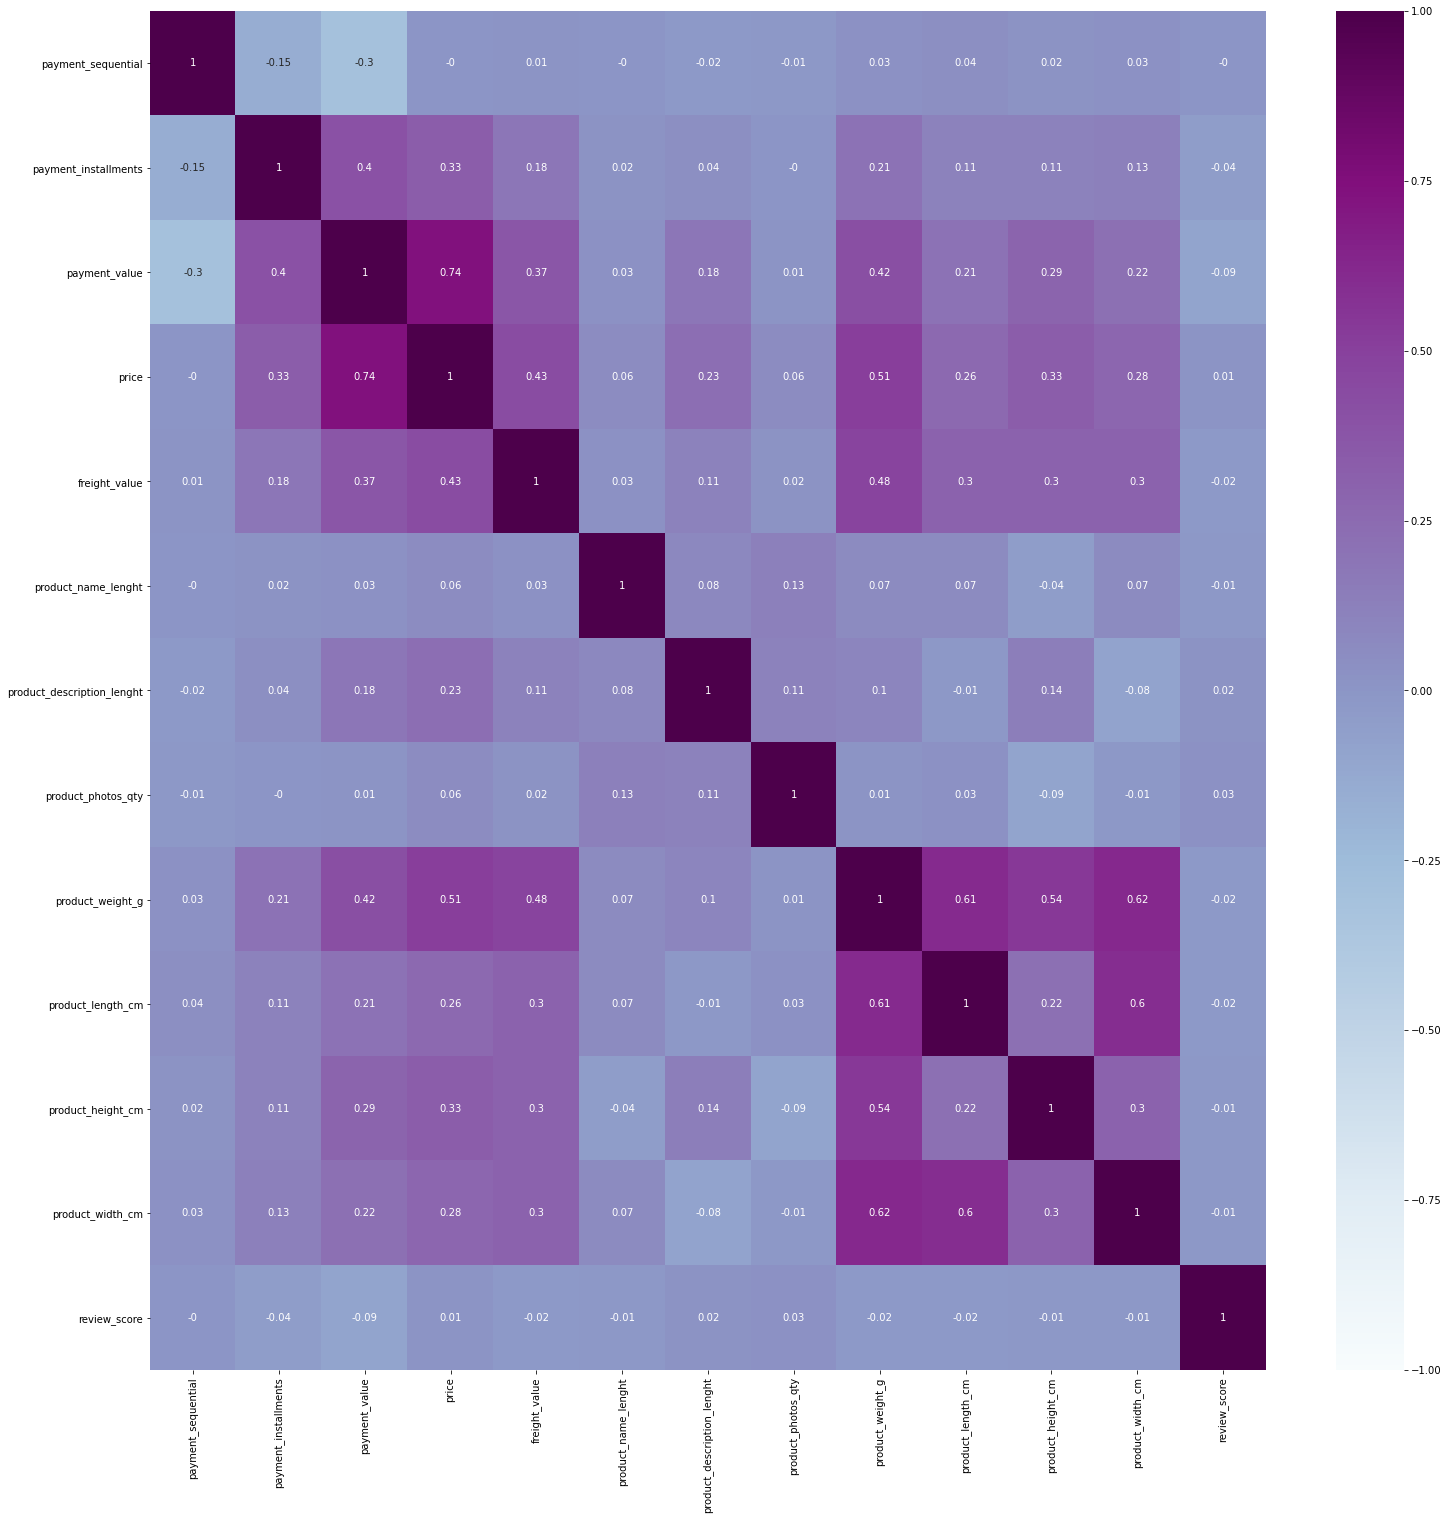

In [ ]:
fig = plt.figure(figsize = (25,25))
sns.heatmap(matrix.round(2), vmax=1, vmin=-1, cmap='BuPu',annot=True)

### Statistics

### anova

#### one_sample ttest

In [ ]:
olist.price.mean()

120.0157796324571

hypothesis,

𝐻_0: 𝑥 ̅_price=𝜇_price (120);
𝐻_1: 𝑥 ̅_price≠𝜇_price (120)


Level of significance is 95% (𝛼=0.05) ;;
Rejection criterion. If p-value is less than 0.05 reject null hypothesis 


In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
tscore, pvalue = ttest_1samp(olist.price, popmean=120.02)
print("t Statistic: {:.4f}".format(tscore))  
print("P Value: {:.4f}".format(pvalue))
print()
print('************ Decision rule***********')
print()
if pvalue<0.05:
    print('The p-value is less than aplha = 0.05, reject the null hypothesis')
else:
    print('Since p-value is greater than 0.05, there is no sufficient evidence to reject the null hypothesis')

t Statistic: -0.0078
P Value: 0.9938

************ Decision rule***********

Since p-value is greater than 0.05, there is no sufficient evidence to reject the null hypothesis


So, the population mean = hypothesised mean.

#### Multiple linear regression

In [ ]:
import statsmodels.api as sm

In [ ]:
predictors = olist[['freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score']]
response = olist.price

mult_mod = sm.OLS(response, predictors)
mult_res = mult_mod.fit()
print(mult_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                          2.310e+04
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        09:54:00   Log-Likelihood:                     -7.0596e+05
No. Observations:              114073   AIC:                                  1.412e+06
Df Residuals:                  114061   BIC:                                  1.412e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

From the above results the predictors achieved R-squared of 70.8% so they are statistically significant fro
prediction of price.

#### Machine Learning

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRFRegressor

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
def encode():
    le = LabelEncoder()

    for col in categorical_variables_df:
        olist[col] = le.fit_transform(olist[col].astype(str))
    print (olist.info())
    
encode()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114073 entries, 0 to 115710
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_status                114073 non-null  int32  
 1   payment_sequential          114073 non-null  int64  
 2   payment_type                114073 non-null  int32  
 3   payment_installments        114073 non-null  int64  
 4   payment_value               114073 non-null  float64
 5   customer_city               114073 non-null  int32  
 6   customer_state              114073 non-null  int32  
 7   price                       114073 non-null  float64
 8   freight_value               114073 non-null  float64
 9   product_category_name       114073 non-null  int32  
 10  product_name_lenght         114073 non-null  float64
 11  product_description_lenght  114073 non-null  float64
 12  product_photos_qty          114073 non-null  float64
 13  product_weight

In [ ]:
olist.head(2)

order_status  payment_sequential  payment_type  payment_installments  \
0             1                   1             1                     1   
1             1                   3             3                     1   

   payment_value  customer_city  customer_state  price  freight_value  \
0          18.12           3554              25  29.99           8.72   
1           2.00           3554              25  29.99           8.72   

   product_category_name  product_name_lenght  product_description_lenght  \
0                     72                 40.0                       268.0   
1                     72                 40.0                       268.0   

   product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                 4.0             500.0               19.0                8.0   
1                 4.0             500.0               19.0                8.0   

   product_width_cm  review_score  seller_city  seller_state  
0              13.0             4          318            21  
1              13.0             4          318            21

In [ ]:
olist.shape

(114073, 20)

#### Feature selection

In [ ]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from math import sqrt

#### split data for feature selecion

In [ ]:
X = olist.drop(['price'], 1)
y = olist.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)
print('Train predictors: {} and train labels: {}'.format(X_train.shape, y_train.shape))
print('Test predictors: {} and test labels: {}'.format(X_test.shape, y_test.shape))

Train predictors: (79851, 19) and train labels: (79851,)
Test predictors: (34222, 19) and test labels: (34222,)


#### Feature selection

In [ ]:
cv = KFold(n_splits=10, random_state= 10, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)), 2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 86.81
R_squared: 0.77


#### Filter features by variation

In [ ]:
olist.var()

order_status                  6.136099e-05
payment_sequential            4.685223e-01
payment_type                  4.161626e-01
payment_installments          7.737901e+00
payment_value                 7.082141e+04
customer_city                 1.430323e+06
customer_state                4.993096e+01
price                         3.327092e+04
freight_value                 2.473223e+02
product_category_name         4.882662e+02
product_name_lenght           1.003346e+02
product_description_lenght    4.232300e+05
product_photos_qty            2.951544e+00
product_weight_g              1.420067e+07
product_length_cm             2.610604e+02
product_height_cm             1.806235e+02
product_width_cm              1.378202e+02
review_score                  1.843882e+00
seller_city                   2.533211e+04
seller_state                  2.330487e+01
dtype: float64

In [ ]:
X = X.drop(columns = ['payment_sequential','payment_type','order_status'])

In [ ]:
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)), 2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

RMSE: 84.02
R_squared: 0.79


#### filter by correlation

Filtering by correlation reduced the accuracy so i just used variance

In [ ]:
abs(olist.corr()["price"])

order_status                  0.001190
payment_sequential            0.000124
payment_type                  0.009514
payment_installments          0.278453
payment_value                 0.736403
customer_city                 0.021872
customer_state                0.044717
price                         1.000000
freight_value                 0.415111
product_category_name         0.000339
product_name_lenght           0.019871
product_description_lenght    0.200911
product_photos_qty            0.053482
product_weight_g              0.340153
product_length_cm             0.142944
product_height_cm             0.223067
product_width_cm              0.172921
review_score                  0.001979
seller_city                   0.036637
seller_state                  0.080643
Name: price, dtype: float64

In [ ]:
#X = X.drop(columns = ['product_name_lenght','customer_state','seller_city', 'customer_city', 'customer_state',])

#### Checking R-squared and adj R-squared again

In [ ]:
predictors = olist[['freight_value', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm',
                      'product_height_cm', 'product_width_cm', 'seller_state', 'payment_installments', 'payment_value']]
response = olist.price

mult_mod = sm.OLS(response, predictors)
mult_res = mult_mod.fit()
print(mult_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                          2.747e+04
Date:                Thu, 19 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:16:14   Log-Likelihood:                     -7.0633e+05
No. Observations:              114073   AIC:                                  1.413e+06
Df Residuals:                  114063   BIC:                                  1.413e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

##### Split data with the significant features for model training


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)
print('Train predictors: {} and train labels: {}'.format(X_train.shape, y_train.shape))
print('Test predictors: {} and test labels: {}'.format(X_test.shape, y_test.shape))

Train predictors: (79851, 16) and train labels: (79851,)
Test predictors: (34222, 16) and test labels: (34222,)


#### Training machine learning models

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

linear regression

In [ ]:
LinReg = LinearRegression().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LinReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LinReg.score(X_test, y_test)))

R-squared of the training: 0.583
R-squared of the test: 0.587


In [ ]:
price_predicted = LinReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100



print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE= {:.3f}%'.format(mape))

RMSE: 116.427
MSE: 13555.201
MAE: 53.348
MAPE= 67.225%


Ridge regression

In [ ]:
RidgeReg = Ridge().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RidgeReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RidgeReg.score(X_test, y_test)))

R-squared of the training: 0.583
R-squared of the test: 0.587


In [ ]:
price_predicted = RidgeReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100



print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 116.427
MSE: 13555.201
MAE: 53.347
MAPE: 67.225


Lasso Regression

In [ ]:
LassoReg = Lasso().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LassoReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LassoReg.score(X_test, y_test)))

R-squared of the training: 0.583
R-squared of the test: 0.587


In [ ]:
price_predicted = LassoReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100

print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))


RMSE: 116.430
MSE: 13555.975
MAE: 53.162
MAPE: 66.803


Decision Tree Regression

In [ ]:
DTReg = DecisionTreeRegressor( criterion='mse', max_depth=10, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(DTReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(DTReg.score(X_test, y_test)))

R-squared of the training: 0.890
R-squared of the test: 0.818


In [ ]:
price_predicted = DTReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 77.327
MSE: 5979.401
MAE: 31.211
MAPE: 41.167


Random Forest Regression

In [ ]:
RFReg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RFReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RFReg.score(X_test, y_test)))

R-squared of the training: 0.984
R-squared of the test: 0.909


In [ ]:
price_predicted = RFReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))


RMSE: 54.812
MSE: 3004.344
MAE: 17.762
MAPE: 20.743


Bagging Regression

In [ ]:
BReg = BaggingRegressor(base_estimator=None, n_estimators=100,max_features=1.0,random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(BReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(BReg.score(X_test, y_test)))

R-squared of the training: 0.986
R-squared of the test: 0.909


In [ ]:
price_predicted = BReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 54.553
MSE: 2976.057
MAE: 16.669
MAPE: 18.067


Adaboost regression

In [ ]:
AReg = AdaBoostRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(AReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(AReg.score(X_test, y_test)))

R-squared of the training: -1.934
R-squared of the test: -1.970


In [ ]:
price_predicted = AReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 312.340
MSE: 97555.978
MAE: 273.081
MAPE: 536.691


Gradient Boost Regression

In [ ]:
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=11, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(GBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(GBReg.score(X_test, y_test)))

R-squared of the training: 0.998
R-squared of the test: 0.921


In [ ]:
price_predicted = GBReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 51.071
MSE: 2608.268
MAE: 15.173
MAPE: 17.882


XGB Regression

In [ ]:
XGBReg = XGBRFRegressor().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(XGBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(XGBReg.score(X_test, y_test)))

R-squared of the training: 0.801
R-squared of the test: 0.767


In [ ]:
price_predicted = XGBReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

RMSE: 87.556
MSE: 7665.971
MAE: 40.414
MAPE: 53.709


#### Prediction

In [ ]:
np.set_printoptions(precision=2)
y_pred = GBReg.predict(X_train)
pred = np.concatenate(( y_pred, y_test),0)
pred.shape

(114073,)

In [ ]:
#GETTING ACCURACY
from sklearn.metrics import r2_score
y_pred = GBReg.predict(X_test)
print(r2_score(y_test, y_pred))

0.9205851510719811


In [ ]:
submission = pd.DataFrame({
        "price": olist["price"],
        "price_predicted": pred
    })

submission.to_csv('price_predicted.csv', index=True)